In [15]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/training_mush.csv')

In [8]:
X = df.drop(['class'], axis=1)

In [9]:
y = df['class']

In [18]:
clf_rf = RandomForestClassifier(random_state=0)

In [19]:
parameters = {'n_estimators' : range(10, 50, 10), 'max_depth' : range(1, 12, 2),
             'min_samples_leaf' : range(1, 7), 'min_samples_split' : range(2, 9, 2)}

In [21]:
%%time
grid_clf = GridSearchCV(clf_rf, parameters, cv=3, n_jobs=-1)
grid_clf.fit(X, y)
grid_clf.best_params_

CPU times: user 5.82 s, sys: 220 ms, total: 6.04 s
Wall time: 58.9 s


{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [24]:
best_clf = grid_clf.best_estimator_

In [34]:
feature_importances_df = pd.DataFrame({'features':list(X.columns), 
                                       'feature_importances':  best_clf.feature_importances_})\
                        .sort_values(by='feature_importances', ascending=False)

In [35]:
feature_importances_df

,features,feature_importances
4,odor,0.188376
8,gill-color,0.103861
10,stalk-root,0.103793
19,spore-print-color,0.083564
6,gill-spacing,0.080840
18,ring-type,0.070726
3,bruises,0.070109
7,gill-size,0.068461
12,stalk-surface-below-ring,0.048296
20,population,0.043783


In [36]:
test_df = pd.read_csv('https://stepik.org/media/attachments/course/4852/testing_mush.csv')

In [60]:
y_pred = best_clf.predict(test_df)
pd.Series(y_pred).value_counts()

0    1055
1     976
dtype: int64

In [61]:
y_true = pd.read_csv('~/Documents/Stepik + ODS/data/testing_y_mush.csv')

In [62]:
from sklearn.metrics import confusion_matrix

In [64]:
matrix = confusion_matrix(y_pred, y_true)

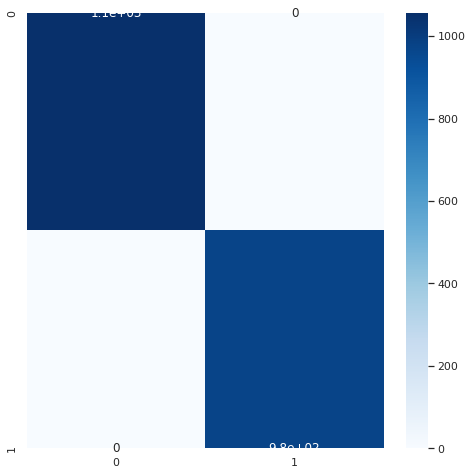

In [71]:
import seaborn as sns
sns.set(rc={'figure.figsize': (8, 8)})
sns.heatmap(matrix, annot=True, cmap="Blues");